#### *DATA IMPORTS*

In [1]:
import os
import tarfile
import zipfile
from six.moves import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
Housing_path = "datasets"
Housing_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"  

In [3]:
def fetch_housing_data(housing_url=Housing_url, housing_path=Housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=Housing_path):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [5]:
data = load_housing_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [7]:
#value_counts will count the no. of categories in a categorical variable
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# it will describe only the numerical parameters 
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### *DATA VISUALIZATIONS*

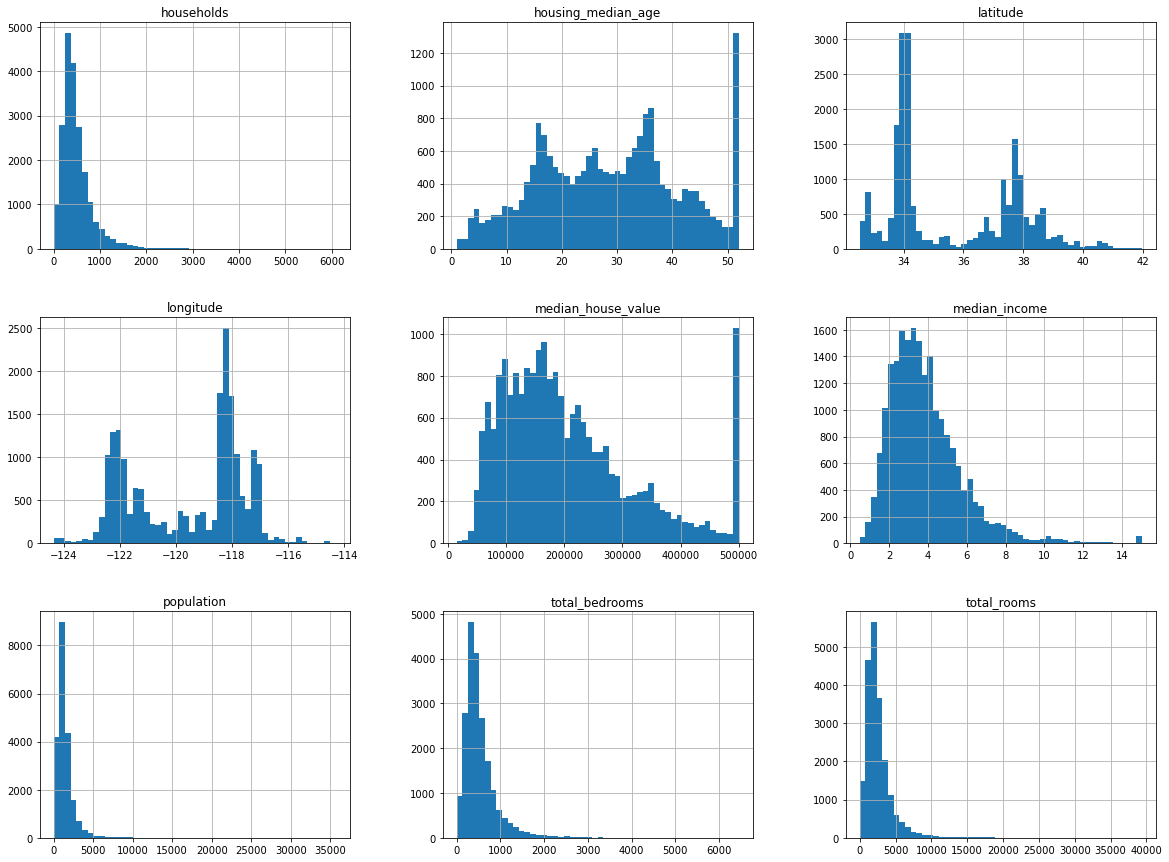

In [9]:
data.hist(bins=50,figsize=(20,15))
plt.show()

#### *CREATING TRAINING AND TEST SETS*

In [ ]:
def train_test_split(data,test_ratio):
    np.random.seed(0)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_set = data[:test_set_size].values
    train_set = data[test_set_size:].values
    return train_set,test_set

In [ ]:
train_set,test_set = train_test_split(data,0.2)

In [10]:
'''To avoid sampling bias we need to, we need all possibilities in the test data from the seemingly 
important columns at the least.
To acheive this, we will categorize median_income column(which seems important in determining the price)
and then sample train_set and test_set from each categories.'''
data["housing_cat"] = pd.cut(data["median_income"],
                            bins = [0,1.5,3.0,4.5,6,np.inf], labels=[1,2,3,4,5,])

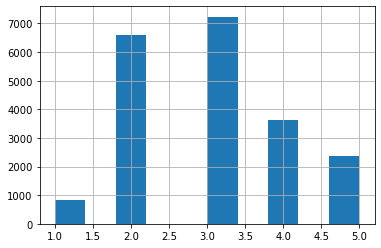

In [11]:
data["housing_cat"].hist()
plt.show()

In [12]:
# split.split is just finding the index no.s which are to be kept in train and test sets 
# to sample from each category we need to import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
for train_index,test_index in split.split(data,data["housing_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [13]:
strat_train_set['housing_cat'].value_counts()

3    5789
2    5265
4    2911
5    1889
1     658
Name: housing_cat, dtype: int64

In [14]:
strat_test_set['housing_cat'].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: housing_cat, dtype: int64

In [15]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("housing_cat",axis=1,inplace=True)

In [16]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856,142800.0,<1H OCEAN
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694,57900.0,INLAND
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991,181300.0,<1H OCEAN
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750,245300.0,<1H OCEAN
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694,73900.0,INLAND


In [17]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5784,-118.25,34.15,15.0,3712.0,1005.0,1888.0,890.0,3.6875,209600.0,<1H OCEAN
378,-122.17,37.74,34.0,1223.0,281.0,824.0,280.0,2.2917,92500.0,NEAR BAY
11018,-117.80,33.77,29.0,5436.0,707.0,2046.0,685.0,8.7496,349500.0,<1H OCEAN
20392,-118.87,34.23,14.0,4242.0,746.0,1858.0,689.0,6.0145,287100.0,<1H OCEAN
1999,-119.77,36.74,20.0,1855.0,519.0,1091.0,443.0,1.5547,93900.0,INLAND


### *DATA VISUALIZATIONS*

In [18]:
# copying the dataset(still in dataframe)
housing = strat_train_set.copy()

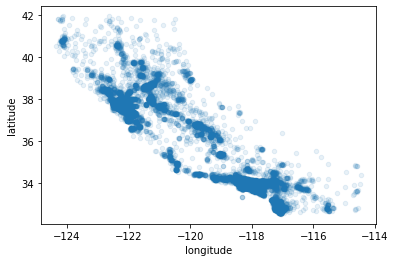

In [19]:
# if there are many more districts nearby a particular location, then alpha will show the 
#collective darkness of that particulat location
housing.plot(kind='scatter',x='longitude',y ='latitude',alpha=0.1)
plt.show()

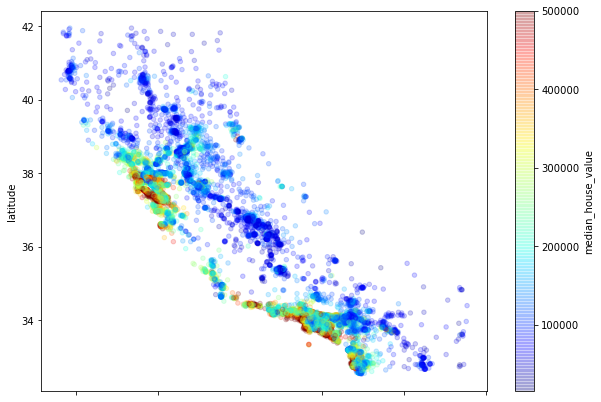

In [20]:
# non_zero alpha will help to visualize tyhe differnce between high and less dense areas 
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

In [21]:
# calculating the correlations
'''Linear correlationships between two variables mean that if you increase value of one variable,
will the value of the other variable increase(+ve corr) or decrease(-ve corr) or 0(can't say).'''

'''correlation close to 1 means strong linear correlation and -1 is the just opposite. 0 corr means that 
there is no linear relation between them'''
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688883
total_rooms           0.137469
housing_median_age    0.107144
households            0.069177
total_bedrooms        0.053544
population           -0.023797
longitude            -0.043236
latitude             -0.145570
Name: median_house_value, dtype: float64

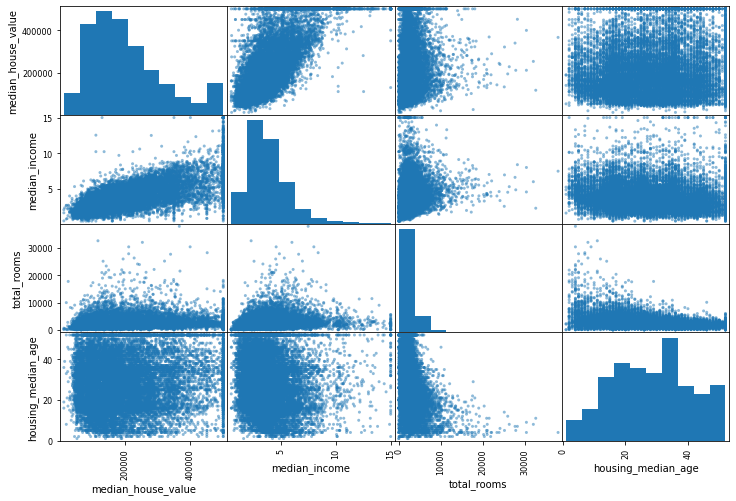

In [22]:
'''Things which are generally done by .corr() attribute, it can be done visually by 
pandas.plotting.scatter_matrix class. It genertates n**2 plots if n is number of numerical_attribute'''
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

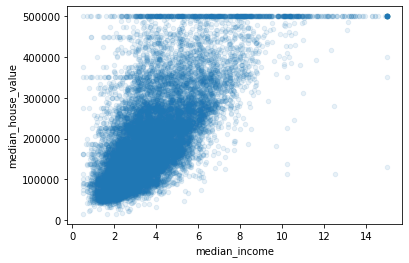

In [23]:
# the most promising attribute(high_corr or low_corr) for median_house_value is median_income
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
plt.show()

In [24]:
'''before preparing for training and testing data we should try out for new attributes, which seems 
important to us but they are not having much higher or lower correlations. For ex, bedrooms attribute have
a lower correlation but let us try out a attribute bedrooms/no.of_rooms and similar others'''
housing["rooms_per_household"] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [25]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688883
rooms_per_household         0.157620
total_rooms                 0.137469
housing_median_age          0.107144
households                  0.069177
total_bedrooms              0.053544
population                 -0.023797
population_per_household   -0.026888
longitude                  -0.043236
latitude                   -0.145570
bedrooms_per_room          -0.255870
Name: median_house_value, dtype: float64

#### *DATA PREPROCESSING*

In [26]:
housing_data = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [27]:
'''All three possible options we can do for a numerical column having missing values
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
We can do option 3 by SimpleImputer class of sklearn.impute
'''
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# median can only be performed on numreical attributes, so first we have to select numerical att. only
housing_num = housing_data.drop('ocean_proximity',axis=1)
imputer.fit(housing_num) # will find the median
X = imputer.transform(housing_num) # will fill the missing values and return a numoy array

In [28]:
'''Now these values will be used for filling any missing data in training as well test set'''
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

In [29]:
# housing_tr is the transformed data with all values filled but it doesn't contain the categorical att.
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [30]:
#now let's transform the categorical att.
housing_cat = housing_data[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_en = ordinal_encoder.fit_transform(housing_cat)

In [31]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
# our final goal is to one hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_one_hot = cat_encoder.fit_transform(housing_cat)

In [33]:
# it is a sparse matrix containig only the position of non_zero elements, can convert it to normal array by
# toarray() method
housing_cat_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
housing_cat_one_hot = housing_cat_one_hot.toarray()
housing_cat_one_hot

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
'''Sometimes it is possible that we have to make the transformations not included in the sklearn class.
So,we can make the new class instead of doing it manually everytime as we can create transformation 
pipeline which will we applicable to any such dataset(train and test)'''
# by including the transformer_mixin class we ensured that the class automatically contains the fit_transform method  
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            # np.c_() is concatenation on axis=1
            return np.c_[X,rooms_per_household,population_per_household,bedroom_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [37]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.fit(housing.values)

#### *DATA PIPELINE*

In [38]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler()),
])

In [39]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [40]:
from sklearn.compose import ColumnTransformer
housing_data = strat_train_set.drop('median_house_value',axis=1)
housing_lables = strat_train_set['median_house_value'].copy()
housing_num = housing_data.drop('ocean_proximity',axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

In [42]:
housing_prepared = full_pipeline.fit_transform(housing_data)

In [43]:
housing_prepared.shape

(16512, 16)

In [45]:
print(housing_num.shape)
print(housing_data.shape)
print(housing_labels.shape)
print(housing_prepared.shape)

(16512, 8)
(16512, 9)
(16512,)
(16512, 16)


#### *TRAINING THE MODEL*
   *We will try out the following models -* 
    
   (1). *Linear Regression*
   (2). *Decision Tree Regressor*
   (3). *Random Forest Regressor*
       

### *(1). Linear Regression*

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_lables)

LinearRegression()

In [47]:
some_data = housing_data.iloc[:5] # iloc converts into numpy arrays
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [172713.58885788  43130.16935351 195014.22158132 268919.62476372
  44875.4698183 ]
Labels: [142800.0, 57900.0, 181300.0, 245300.0, 73900.0]


In [48]:
from sklearn.metrics import mean_squared_error 
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68284.24083518104

### *(2). Decision Tree Regressor*

In [49]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [50]:
# signs of badly overfitting the data
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

##### *We should not touch the test set until we are confident about our model, instead we can use a development set for testing our model. We can do this easily by sklearn's  K-fold cross-validation feature.*
Link - https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0
##### *Moreover, cross-validation scores are on the validation dataset. For ex, if we get a score X on simply predicting on training_data and get a score of Y on training with cross_validation and X is much less than Y, then it is a clear sign of overfitting and if X is close to Y this means model is generalizing well*


In [51]:
def display(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [52]:
'''Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than 
a cost function (lower is better), so the scoring function is actually the opposite of the MSE 
(i.e., a negative value), which is why the preceding code computes -scores before calculating the square 
root.
'''

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv = 10)      
tree_rmse_scores = np.sqrt(-scores)

In [53]:
display(tree_rmse_scores)

Scores: [73110.43531191 73030.26658733 70266.25889425 71242.22159236
 69732.28714812 70577.9796222  73145.74696708 74406.1946862
 67528.30960133 70326.4938935 ]
Mean: 71336.6194304273
Standard deviation: 1963.1014895546796


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10)       
lin_rmse_scores = np.sqrt(-lin_scores)

In [55]:
display(lin_rmse_scores)

Scores: [68816.92050905 69919.6105217  66113.14067776 67981.42224765
 68715.57149727 69992.34941025 67163.97848562 70841.91062928
 66611.37068257 68651.01821515]
Mean: 68480.72928763037
Standard deviation: 1456.3942894476725


#### *(3). Random Forest Regressor*

In [56]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [57]:
# forest_rmse is also overfitting the data
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions, housing_labels)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.0

In [58]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv=10 ) 
forest_rmse_scores = np.sqrt(-forest_scores)

In [59]:
display(forest_rmse_scores)

Scores: [49555.10929293 53507.05579919 48057.08330077 50328.65693229
 51109.82925671 48007.45875856 49266.7136893  50945.947303
 50599.66270902 51645.69774248]
Mean: 50302.321478426566
Standard deviation: 1586.4649114177314


#### *Saving the models for further comparision or uses*
(can use sklearn.externals.joblib for this and save the model as joblib.dump(my_model, "my_model.pkl")
and load the model as my_model_loaded = joblib.load("my_model.pkl") )

### *Fine Tuning*
(We fine tune our model after we get some good promising models, so we can use grid search for this)

In [60]:
from sklearn.model_selection import GridSearchCV
# we are trying fine tuning only for random_forest model only, as that was much promissing than the others
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", 
                           return_train_score=True) 
grid_search.fit(housing_prepared, housing_labels)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [61]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [63]:
grid_search_results = grid_search.cv_results_
for mean_score, params in zip(grid_search_results["mean_test_score"], grid_search_results["params"]):
    print(np.sqrt(-mean_score), params)


64025.51405743095 {'max_features': 2, 'n_estimators': 3}
55385.19669047619 {'max_features': 2, 'n_estimators': 10}
52817.461158204205 {'max_features': 2, 'n_estimators': 30}
60352.52246803652 {'max_features': 4, 'n_estimators': 3}
52605.46089502471 {'max_features': 4, 'n_estimators': 10}
50314.87904743004 {'max_features': 4, 'n_estimators': 30}
58636.65401691377 {'max_features': 6, 'n_estimators': 3}
52135.25094502486 {'max_features': 6, 'n_estimators': 10}
50149.86733053239 {'max_features': 6, 'n_estimators': 30}
59008.052709407275 {'max_features': 8, 'n_estimators': 3}
52074.26646997347 {'max_features': 8, 'n_estimators': 10}
50419.72235889783 {'max_features': 8, 'n_estimators': 30}
62331.630472064644 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54438.69084917888 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59721.803138334646 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52420.10087389407 {'bootstrap': False, 'max_features': 3, 'n_estimators'

The grid search approach is fine when you are exploring relatively few combinations,
like in the GridSearchCV, but when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead


We can also do perform the ensemble methods for better results, i.e. combining the best performing techniques

In [64]:
# analyzing the best models and their errors
# We can get insights of the model and the data, by knowing their relative importance in evaluating the model 
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhlods', "pop_per_hhold",'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes =  num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3222003760334581, 'median_income'),
 (0.1596730375898963, 'INLAND'),
 (0.10774728838066822, 'pop_per_hhold'),
 (0.083009729058401, 'rooms_per_hhlods'),
 (0.07441140118458706, 'longitude'),
 (0.06918434559792337, 'latitude'),
 (0.05065267362722439, 'bedrooms_per_room'),
 (0.03967498031289979, 'housing_median_age'),
 (0.01745023961626933, 'total_rooms'),
 (0.016919269133794598, 'population'),
 (0.01684810911125359, 'total_bedrooms'),
 (0.015968333760101705, 'households'),
 (0.015292403229685274, '<1H OCEAN'),
 (0.006044738227811143, 'NEAR OCEAN'),
 (0.00456756133655402, 'NEAR BAY'),
 (0.0003555137994720457, 'ISLAND')]

With this information, we may want to try dropping some of the less useful features(e.g., apparently only one ocean_proximity category is really useful, so we could try dropping the others).

We should also look at the specific errors that our system makes, then try to understand why it makes them and what could fix the problem (adding extra features or, on the contrary, getting rid of uninformative ones, cleaning up outliers, etc.).


#### *EVALUATING OUR MODEL ON THE TEST_SET*

In [65]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(final_predictions, y_test)
final_rmse = np.sqrt(final_mse)
'''this final_rmse means that on an average the predicted value differs this much from the actual price, 
and this is too much as the actual prices are around 207568.918605 (mean) and we predicting the price in a 
23.35 percent(final_rmse/mean*100) interval of the actual price which is not quite good. So, that is how we 
actually understand the performance metric. Now if the standards are met, we can send this model to 
deployment otherwise we can try out removing different columns and adding new ones , trying a powerful 
model, having more training data.'''
final_rmse 

48485.79130494159

In some cases, such a point estimate of the generalization error will not be quiteenough to convince us to launch: what if it is just 0.1% better than the model currently in production? We might want to have an idea of how precise this estimate is. For this, we can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval()
